

---

# *Netflix Content Analysis: Exploring Trends, Genres, and Viewer Insights with Python*  
*Project Overview*  

---

## *Problem Statement*  
Netflix’s vast library of movies and TV shows holds hidden patterns about content creation, audience preferences, and global trends. However, raw data alone cannot answer critical questions like:  
- How has Netflix’s content strategy evolved over the years?  
- Which genres or countries dominate the platform?  
- What insights can guide content creators or marketers?  

This project solves these challenges by analyzing Netflix’s dataset using *Python* to extract actionable insights through *data visualization, **statistical analysis, and **trend identification*.

---

## *20 Analytical Problems Solved*  
Below are the key questions explored in this analysis:  

### *1. Content Distribution*  
1. What is the ratio of Movies to TV Shows?  
2. Which 5 countries produce the most content?  
3. What are the top 10 genres?  
4. How does content growth vary by release year?  
5. What is the distribution of content ratings (TV-MA, PG-13, etc.)?  

### *2. Temporal Analysis*  
6. Which month has the most content added?  
7. How has content addition changed yearly?  
8. Are there seasonal trends in content additions?  
9. What is the oldest and newest content on Netflix?  

### *3. Genre & Ratings Analysis*  
10. Are certain genres more popular in specific countries?  
11. How does movie duration vary by genre?  
12. Do TV shows have more seasons in certain genres?  
13. Which rating category has the longest average movie duration?  

### *4. Creator & Audience Insights*  
14. Which directors have the most titles?  
15. Which actors appear most frequently?  
16. How do TV show seasons vary across genres?  
17. Which countries produce the most TV-MA-rated content?  

### *5. Statistical & Technical Insights*  
18. What percentage of content is produced in the USA?  
19. What is the average movie duration?  
20. Who are the Most Frequent Actors?  

---

## *Solution Approach*  
- *Tech Stack*: Python, Pandas, NumPy, Matplotlib, Seaborn, Jupyter Notebook.  
- *Key Techniques*:  
  - Data cleaning (handling missing values, text parsing).  
  - Visualization (bar charts, pie plots, line graphs, box plots).  
  - Statistical analysis (correlation, mean, distribution).  
- *Value Delivered*:  
  - Identifies trends for content creators to prioritize genres/countries.  
  - Helps marketers understand audience preferences.  
  - Guides viewers to discover popular content categories.  

---

## *Dataset Used*  
*Netflix Movies and TV Shows* ([Kaggle Link](https://www.kaggle.com/datasets/shivamb/netflix-shows))  
- *Attributes*: Title, Type (Movie/TV Show), Release Year, Rating, Duration, Country, Genre, Cast, Director.  

---


**First we will import all the library required**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('netflix_titles.csv')


**1) What is the ratio of Movies to TV Shows?**

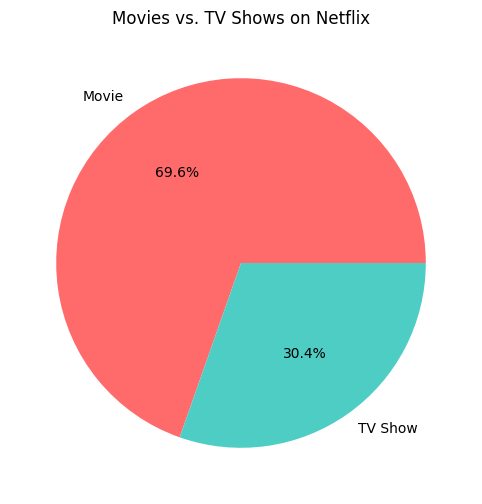

In [ ]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
plt.title('Movies vs. TV Shows on Netflix')
plt.show()

**2) Which 5 countries produce the most content?**

<ipython-input-43-d4971361deff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries.values, y=countries.index, palette='viridis')


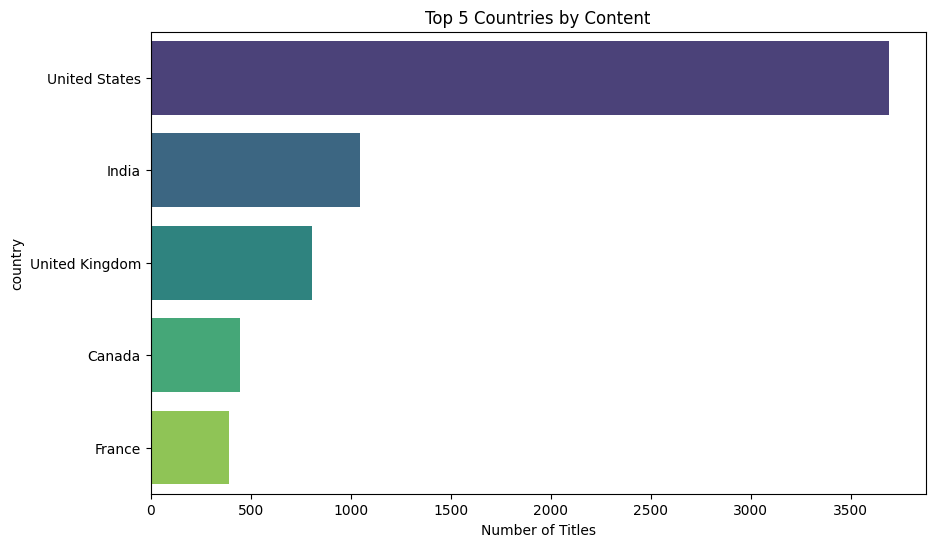

In [ ]:
# Split countries and count
countries = df['country'].str.split(', ').explode().value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=countries.values, y=countries.index, palette='viridis')
plt.title('Top 5 Countries by Content')
plt.xlabel('Number of Titles')
plt.show()

**3) What are the top 10 genres?**

<ipython-input-99-b5c440c03383>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='rocket')


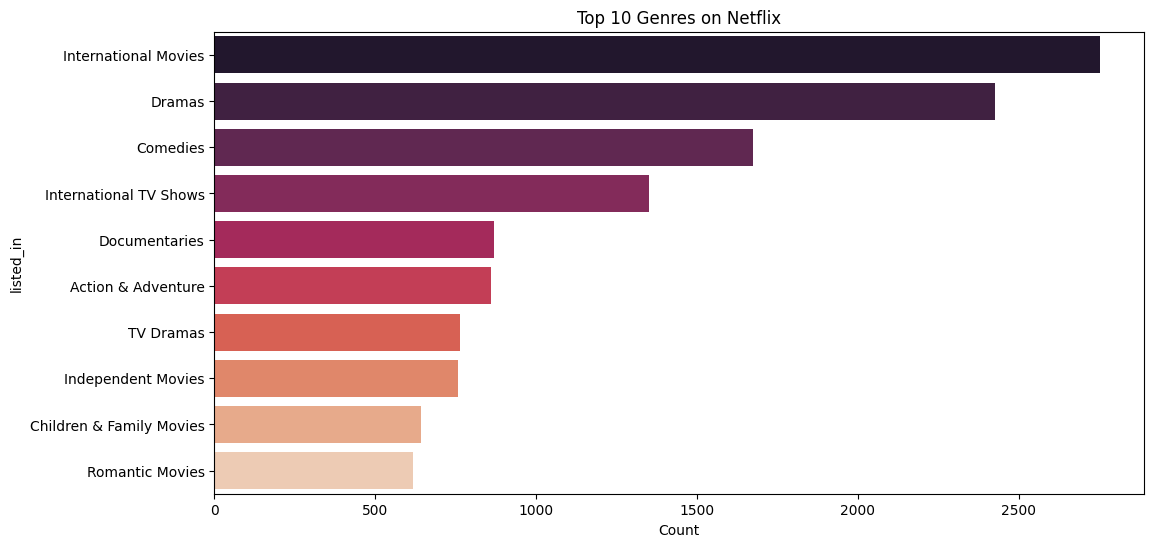

In [ ]:
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genres.values, y=genres.index, palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.show()

**4) How does content growth vary by release year?**

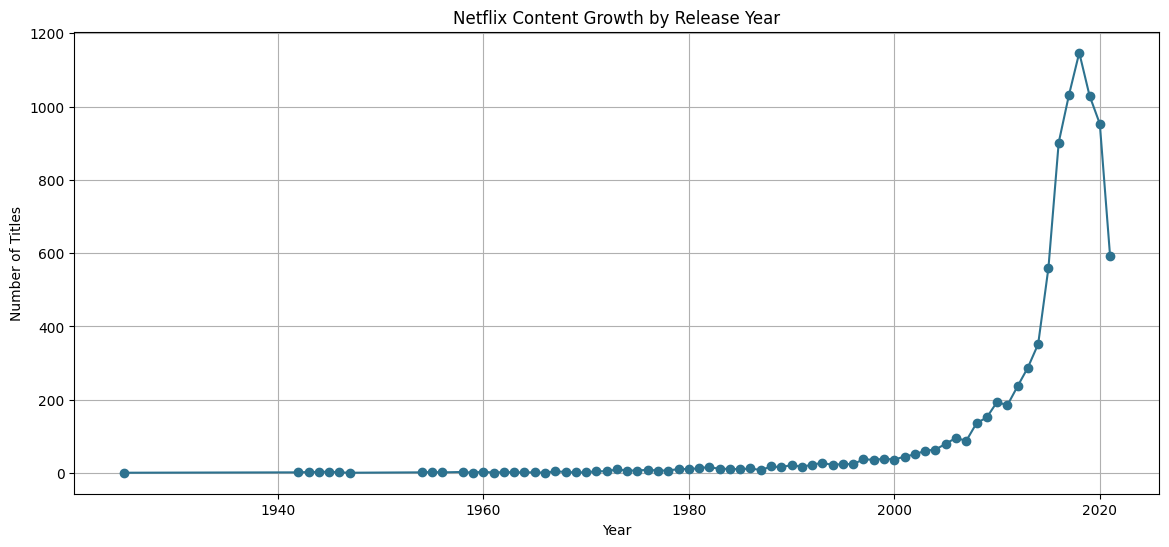

In [ ]:
yearly_data = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', color='#2D728F')
plt.title('Netflix Content Growth by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

**5) What is the distribution of content ratings (TV-MA, PG-13, etc.)?**

<ipython-input-46-4493d5ab4cf0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.index, y=ratings.values, palette='magma')


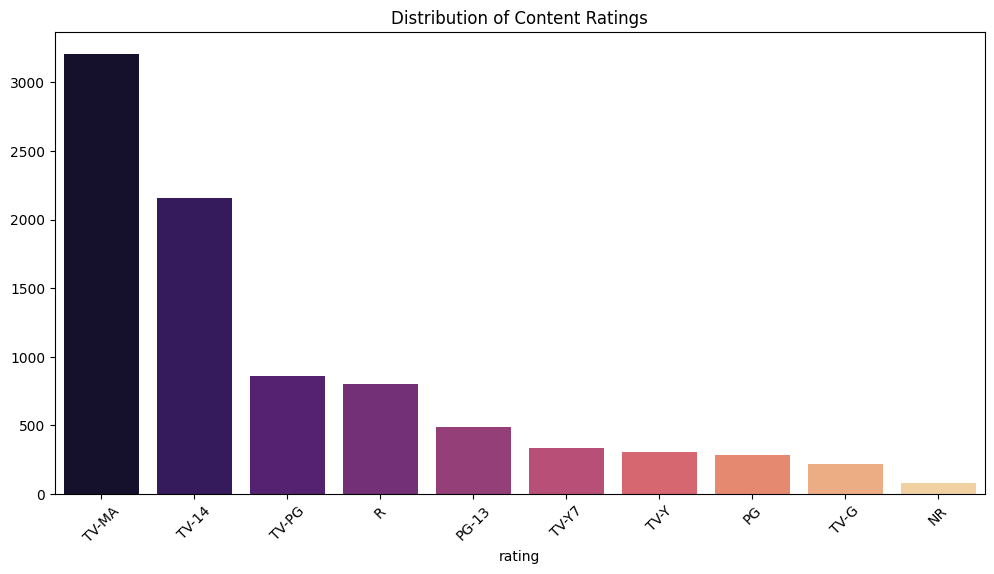

In [ ]:
ratings = df['rating'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings.index, y=ratings.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Distribution of Content Ratings')
plt.show()

**6) Which month has the most content added?**

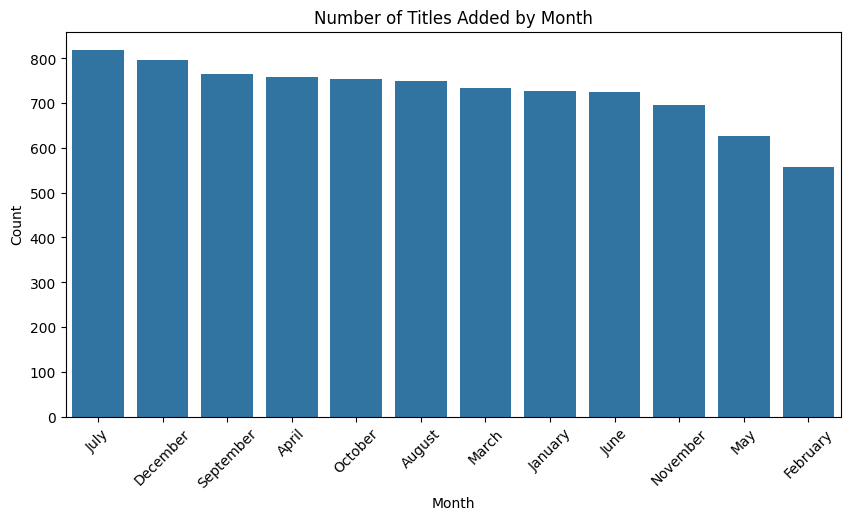

Month counts:
month_added
July         819
December     797
September    765
April        759
October      755
August       749
March        734
January      727
June         724
November     697
May          626
February     557
Name: count, dtype: int64


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()

month_counts = df['month_added'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Number of Titles Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("Month counts:")
print(month_counts)

**7. How has content addition changed yearly?**

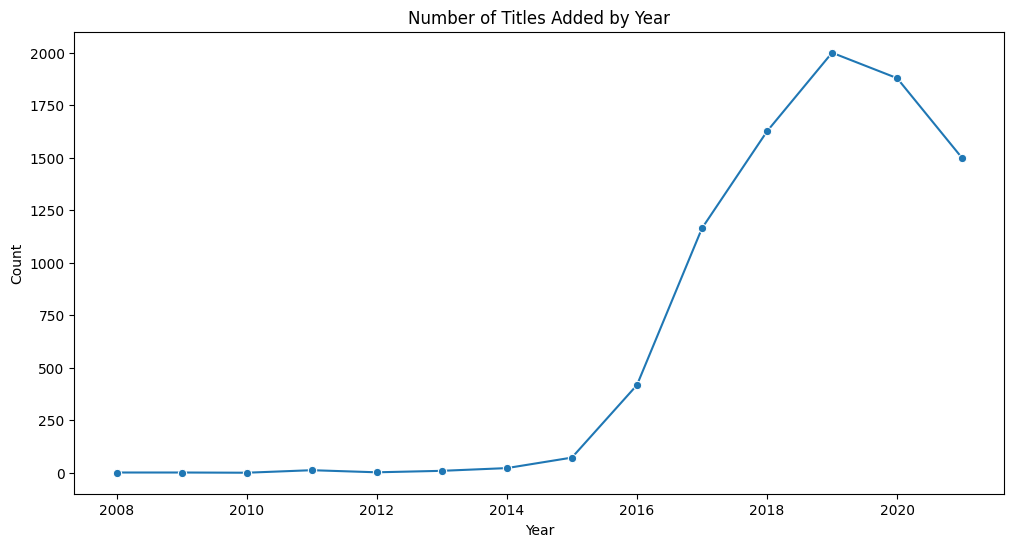

In [ ]:
df['year_added'] = df['date_added'].dt.year
year_added_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_added_counts.index, y=year_added_counts.values, marker='o')
plt.title("Number of Titles Added by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

**8) Are there seasonal trends in content additions?**
Note: Here, we define seasons as:

>Winter: December, January, February
>Spring: March, April, May
>Summer: June, July, August
>Fall: September, October, November


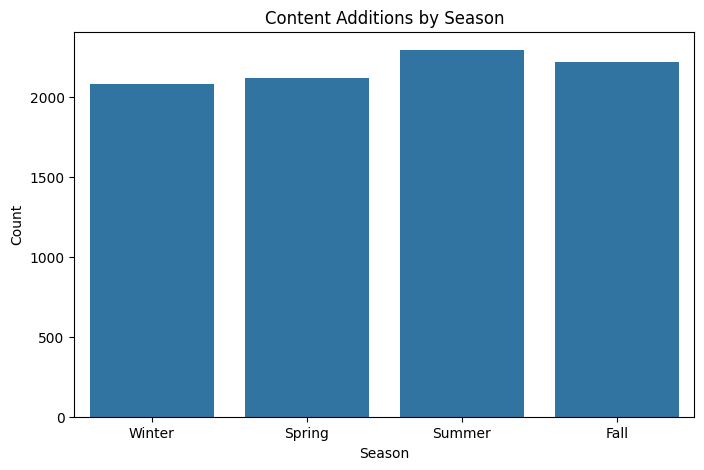

Season counts:
season
Summer    2292
Fall      2217
Spring    2119
Winter    2081
Name: count, dtype: int64


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['month'] = df['date_added'].dt.month
df['season'] = df['month'].apply(lambda x: get_season(x) if pd.notnull(x) else np.nan)

season_counts = df['season'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=season_counts.index, y=season_counts.values,
            order=['Winter','Spring','Summer','Fall'])
plt.title("Content Additions by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

print("Season counts:")
print(season_counts)

**9) What is the oldest and newest content on Netflix?**

In [ ]:
oldest = df.loc[df['release_year'].idxmin()]
newest = df.loc[df['release_year'].idxmax()]

print("Oldest content on Netflix:")
print(f"Title: {oldest['title']}, Year: {oldest['release_year']}")

print("\nNewest content on Netflix:")
print(f"Title: {newest['title']}, Year: {newest['release_year']}")


Oldest content on Netflix:
Title: Pioneers: First Women Filmmakers*, Year: 1925

Newest content on Netflix:
Title: Blood & Water, Year: 2021


**10) Are certain genres more popular in specific countries?**

<ipython-input-51-765cd71f7407>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='combination', data=top_genre_country, palette='viridis')


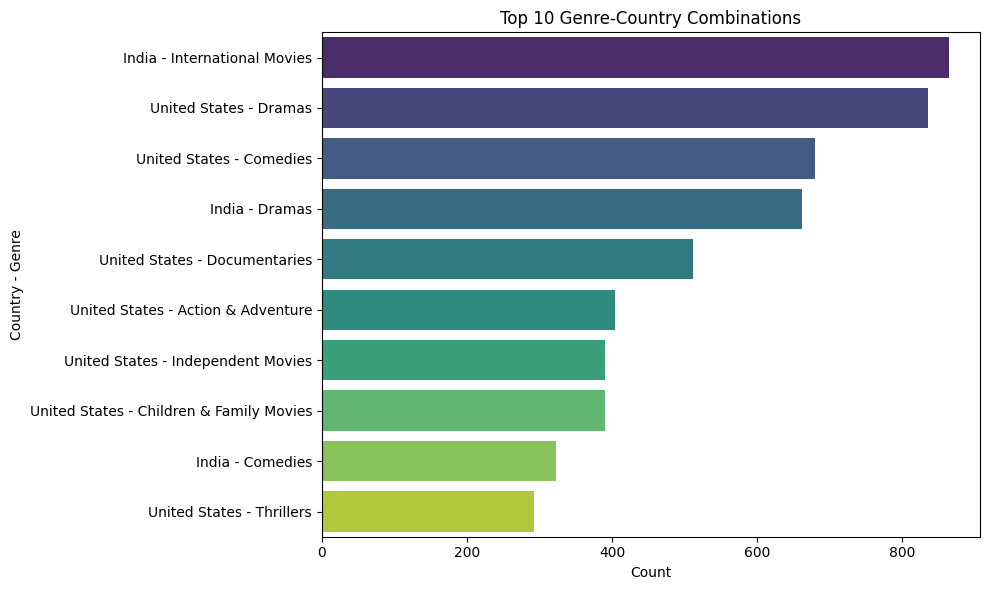

In [ ]:
df_genres = df[['country', 'listed_in']].dropna()

df_genres['country'] = df_genres['country'].str.split(", ")
df_genres = df_genres.explode('country')

df_genres['genre'] = df_genres['listed_in'].str.split(", ")
df_genres = df_genres.explode('genre')

genre_country = df_genres.groupby(['country', 'genre']).size().reset_index(name='count')

top_genre_country = genre_country.sort_values('count', ascending=False).head(10)
top_genre_country['combination'] = top_genre_country['country'] + " - " + top_genre_country['genre']

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='combination', data=top_genre_country, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Country - Genre')
plt.title('Top 10 Genre-Country Combinations')
plt.tight_layout()
plt.show()

**11) How does movie duration vary by genre?**

<ipython-input-52-4c44951e5f30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genre', y='duration_int', data=movies, inner=None, palette="Pastel1")


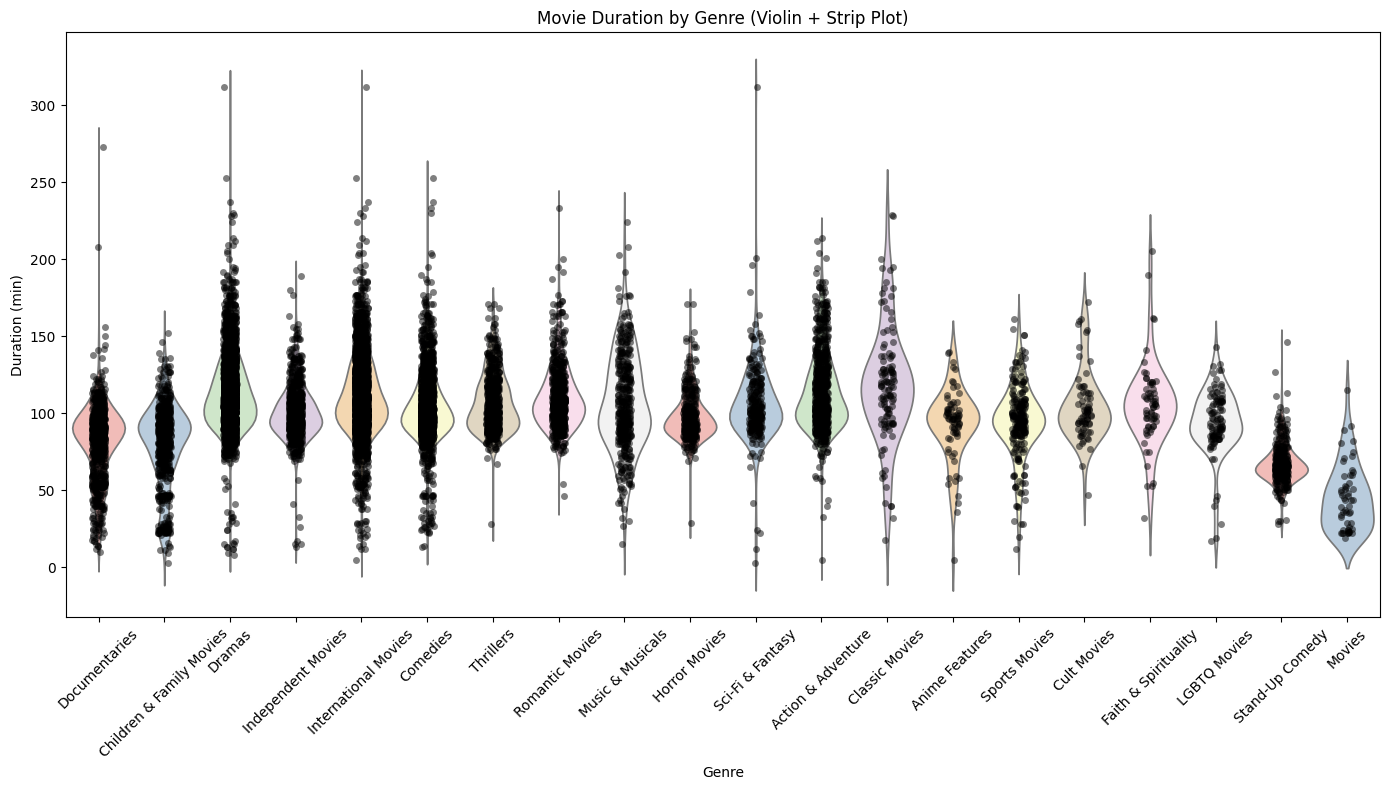

In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = pd.to_numeric(movies['duration'].str.extract('(\d+)')[0], errors='coerce')
movies = movies.dropna(subset=['duration_int'])
movies['duration_int'] = movies['duration_int'].astype(int)

movies['genre'] = movies['listed_in'].str.split(", ")
movies = movies.explode('genre')
movies['genre'] = movies['genre'].str.strip()

plt.figure(figsize=(14,8))
sns.violinplot(x='genre', y='duration_int', data=movies, inner=None, palette="Pastel1")
sns.stripplot(x='genre', y='duration_int', data=movies, color='k', alpha=0.5, jitter=True)
plt.title("Movie Duration by Genre (Violin + Strip Plot)")
plt.xlabel("Genre")
plt.ylabel("Duration (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**12) Do TV shows have more seasons in certain genres?**

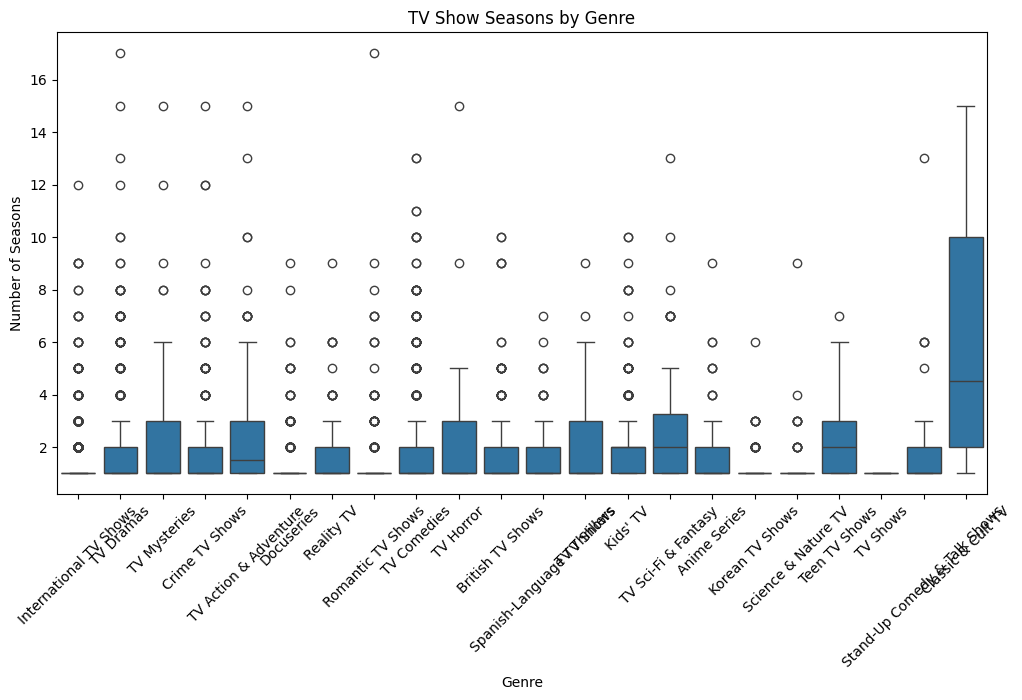

In [ ]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

tv_shows['genre'] = tv_shows['listed_in'].str.split(", ")
tv_shows = tv_shows.explode('genre')

plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='seasons', data=tv_shows)
plt.title("TV Show Seasons by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Seasons")
plt.xticks(rotation=45)
plt.show()

**13) Who are the Most Frequent Actors ?**

<ipython-input-54-45aa2c9a260f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actors.values, y=actors.index, palette='plasma')


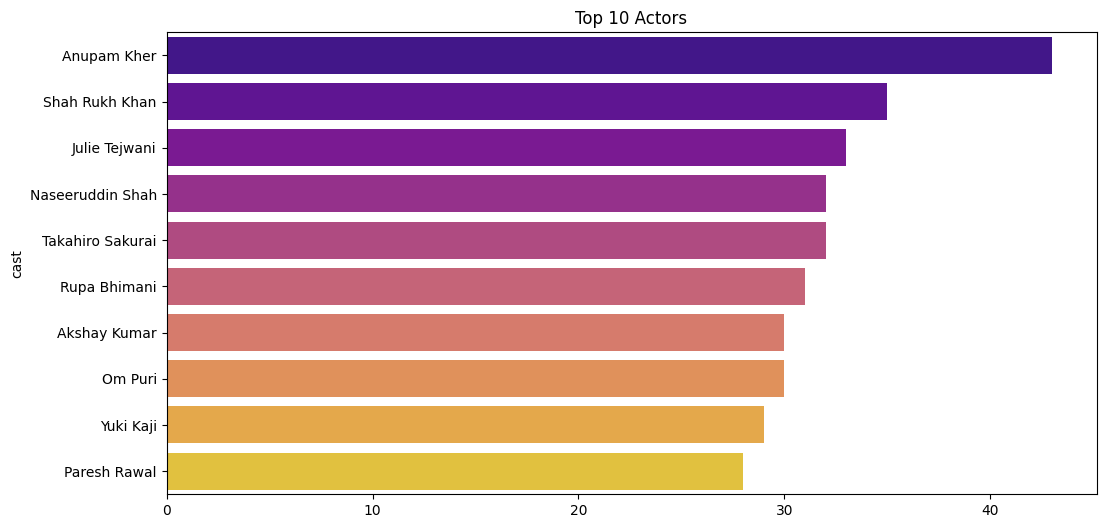

In [ ]:
actors = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=actors.values, y=actors.index, palette='plasma')
plt.title('Top 10 Actors')
plt.show()


**14) Which rating category has the longest average movie duration?**

Average movie duration by rating:
rating
NC-17       132.857143
TV-14       114.356153
PG-13       108.627255
R           107.214829
UR          105.500000
TV-PG       100.221026
TV-MA       100.156805
PG           99.794069
NR           97.136364
G            94.931507
TV-G         83.022814
TV-Y7-FV     68.400000
TV-Y7        67.922705
TV-Y         51.533333
Name: duration_int, dtype: float64


<ipython-input-55-81c41a8f3e15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette="coolwarm")


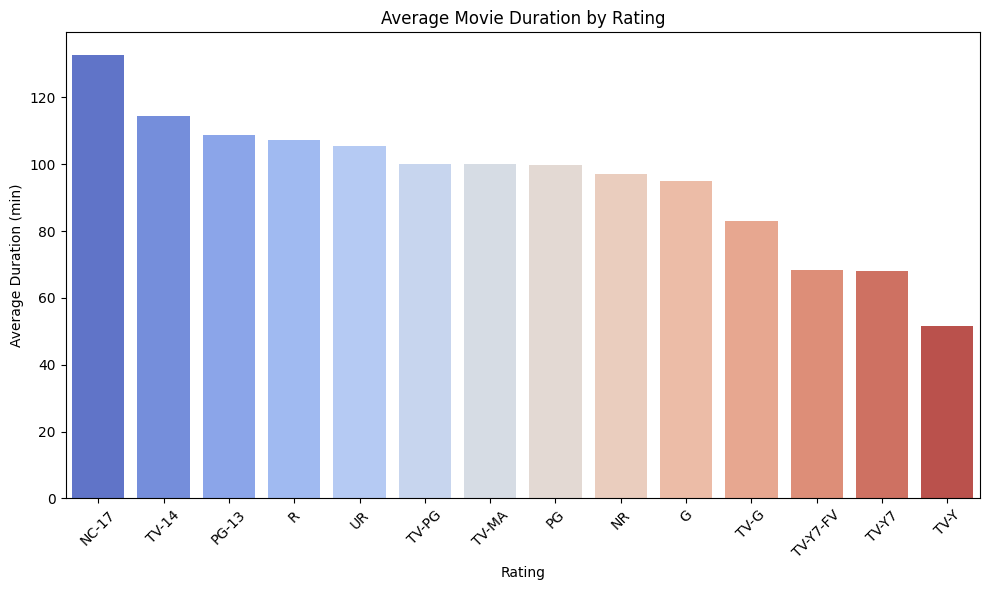

In [ ]:

avg_duration_by_rating = movies.groupby('rating')['duration_int'].mean().sort_values(ascending=False)
print("Average movie duration by rating:")
print(avg_duration_by_rating)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette="coolwarm")
plt.title("Average Movie Duration by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Duration (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**15) Which directors have the most titles?**

Top 10 directors by title count:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64


<ipython-input-56-2fe85d5478aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')


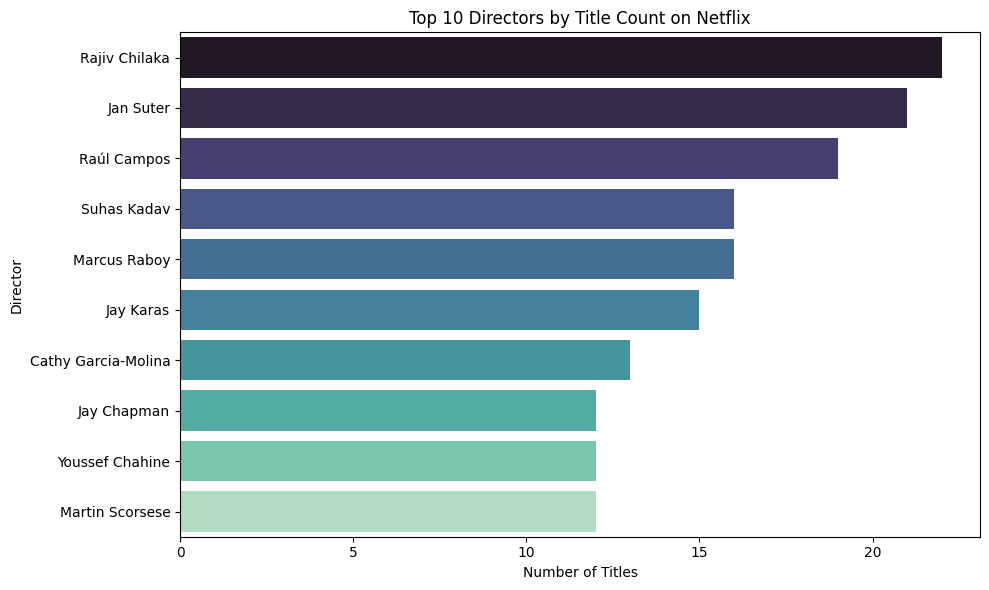

In [ ]:
df_directors = df.dropna(subset=['director']).copy()

df_directors['director'] = df_directors['director'].str.split(", ")
df_directors = df_directors.explode('director')
df_directors['director'] = df_directors['director'].str.strip()

director_counts = df_directors['director'].value_counts()

top_directors = director_counts.head(10)
print("Top 10 directors by title count:")
print(top_directors)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 10 Directors by Title Count on Netflix")
plt.tight_layout()
plt.show()

**16) Which actors appear most frequently?**

In [ ]:
df_cast = df.dropna(subset=['cast']).copy()
df_cast['cast'] = df_cast['cast'].str.split(", ")
df_cast = df_cast.explode('cast')

cast_counts = df_cast['cast'].value_counts().head(10)
print("Top 10 actors by appearance count:")
print(cast_counts)


Top 10 actors by appearance count:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


**17) How do TV show seasons vary across genres?**

In [ ]:
mean_seasons_by_genre = tv_shows.groupby('genre')['seasons'].mean().sort_values(ascending=False)
print("Average number of TV show seasons by genre:")
print(mean_seasons_by_genre)


Average number of TV show seasons by genre:
genre
Classic & Cult TV               5.678571
TV Sci-Fi & Fantasy             2.654762
TV Action & Adventure           2.398810
Teen TV Shows                   2.246377
TV Mysteries                    2.193878
TV Comedies                     2.151463
TV Horror                       2.106667
TV Thrillers                    2.052632
Kids' TV                        1.977827
TV Dramas                       1.850590
Stand-Up Comedy & Talk Shows    1.839286
British TV Shows                1.818182
Crime TV Shows                  1.708511
Anime Series                    1.573864
Reality TV                      1.552941
Spanish-Language TV Shows       1.540230
International TV Shows          1.410067
Romantic TV Shows               1.397297
Docuseries                      1.336709
Science & Nature TV             1.293478
Korean TV Shows                 1.264901
TV Shows                        1.000000
Name: seasons, dtype: float64


**18) Which countries produce the most TV-MA-rated content?***

In [ ]:
tvma = df[df['rating'] == 'TV-MA'].copy()
tvma = tvma.dropna(subset=['country'])
tvma['country'] = tvma['country'].str.split(", ")
tvma = tvma.explode('country')

top_tvma_countries = tvma['country'].value_counts().head(10)
print("Countries with most TV-MA-rated content:")
print(top_tvma_countries)


Countries with most TV-MA-rated content:
country
United States     1100
India              266
United Kingdom     251
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Germany             79
Name: count, dtype: int64


**19) What percentage of content is produced in the USA?**

In [ ]:
usa_mask = df['country'].dropna().str.contains('United States|USA', case=False)
usa_percentage = usa_mask.mean() * 100
print(f"Percentage of titles with USA listed as a country: {usa_percentage:.2f}%")



Percentage of titles with USA listed as a country: 46.26%


**20) What is the average movie duration?**

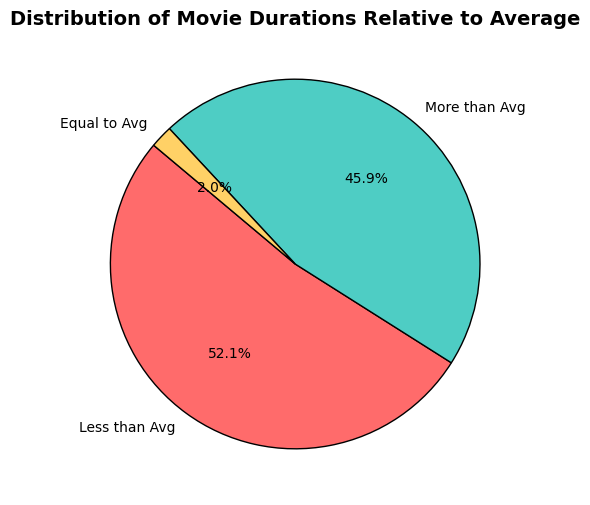


Average movie duration: 103.83 minutes


In [ ]:
import matplotlib.pyplot as plt


avg_movie_duration = movies['duration_int'].mean()
avg = abs(int(avg_movie_duration))

less_than_avg = sum(movies['duration_int'] < avg)
more_than_avg = sum(movies['duration_int'] > avg)
equal_to_avg = sum(movies['duration_int'] == avg)

sizes = [less_than_avg, more_than_avg, equal_to_avg]
labels = ['Less than Avg', 'More than Avg', 'Equal to Avg']
colors = ['#FF6B6B', '#4ECDC4', '#FFD166']

plt.figure(figsize=(8, 6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}, startangle=140
)
plt.title('Distribution of Movie Durations Relative to Average', fontsize=14, fontweight='bold')
plt.show()


print()
print()
print()
print(f"Average movie duration: {avg_movie_duration:.2f} minutes")
